# Bright SNe lightcurves
### Roy Williams
Grab some bright supernovae and plot them.  Demo of:
* /query/
* /lightcurves/

### Python (3 only) requirements - pip install
lasair, matplotlib


In [9]:
#!pip install lasair

In [10]:
endpoint = "https://lasair-lsst.lsst.ac.uk/api"

In [11]:
import sys, time
import matplotlib.pyplot as plt
import numpy as np

### Grab my Lasair API token
Get your Lasair token before you start. You can log into [Lasair](https://lasair.lsst.ac.uk) and click "My Profile"
at top right. Or use the command-line below.
```bash
curl --data "username=myusername&password=***********" https://lasair-ztf.lsst.ac.uk/api/auth-token/
```
Make a file called settings.py with a line like: `API_TOKEN = '0123456789abcdefxxxxxxxxxxxxxxxxxxxxxxxx'`

In [12]:
from lasair import LasairError, lasair_client as lasair
import settings

L = lasair(settings.API_TOKEN, endpoint=endpoint)

In [13]:
# Just join the objects table and the sherlock_classifications table, just
# pulling out the objectId.
rows = L.query(
    "objects.diaObjectId AS objectId",
    'objects, sherlock_classifications',
    """ sherlock_classifications.classification = "SN"
        AND objects.gPSFlux > 2000 AND objects.rPSFlux > 2000
        AND objects.nSources > 10 
    """,
    limit=10)
objectIds = [row['objectId'] for row in rows]
print(objectIds)

[3068394045102359464, 3068394045102359487, 3068394045110747648, 3068394045110747685, 3068394046155129695, 3068394046171907632, 3068394046176100432, 3068394048327778379]


### Plot lightcurve function

In [14]:
bandColors = {'u': '#9900cc', 'g': '#3366ff', 'r':'#33cc33', 'i':'#ffcc00', 'z':'#ff0000', 'y':'#cc6600'}

def plotLC(objectId, diaSources):
    mjd_now = time.time()/86400 + 40587.0
    for band,color in bandColors.items():
        since = []
        magpsf = []
        sigmapsf = []
        for ds in diaSources:
            if ds['band'] == band:
                since.append(ds['midpointMjdTai'] - mjd_now)
                magpsf.append(ds['psfFlux'])
                sigmapsf.append(ds['psfFluxErr'])
        plt.errorbar(since, magpsf, yerr=sigmapsf, c=color)
        plt.xlabel("days before %.2f" % mjd_now)
        plt.ylabel("psf mag")
        plt.title('https://lasair-lsst.lsst.ac.uk/objects/%s' % objectId)
    plt.gca().invert_yaxis()
    plt.show()

### Grab and plot the lightcurves

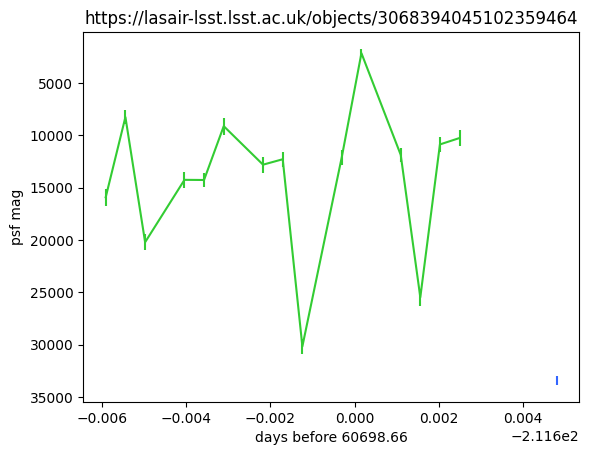

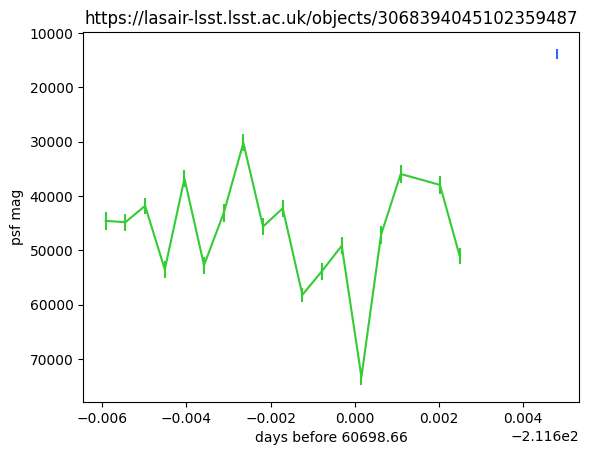

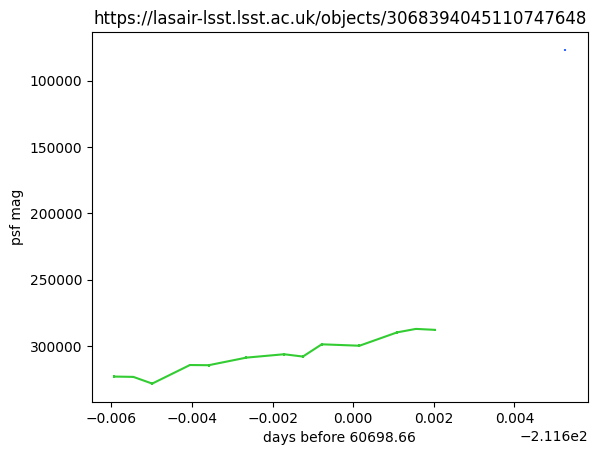

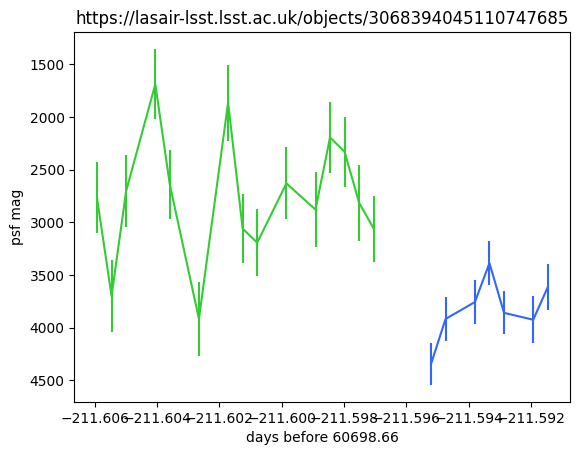

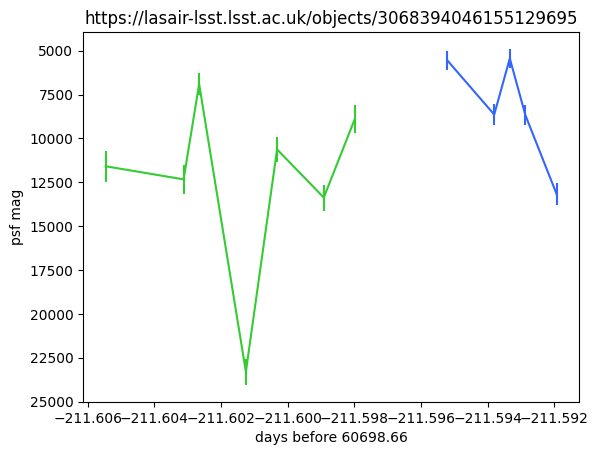

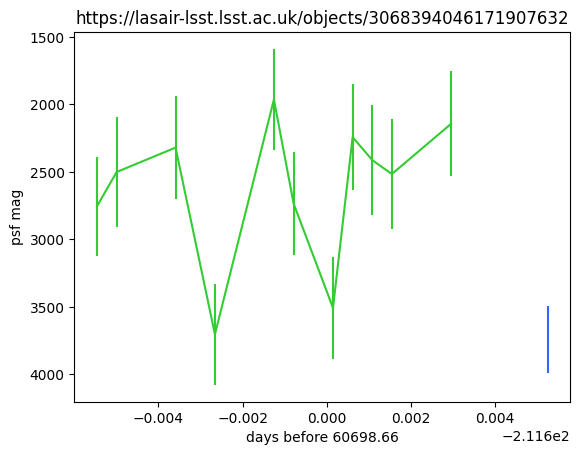

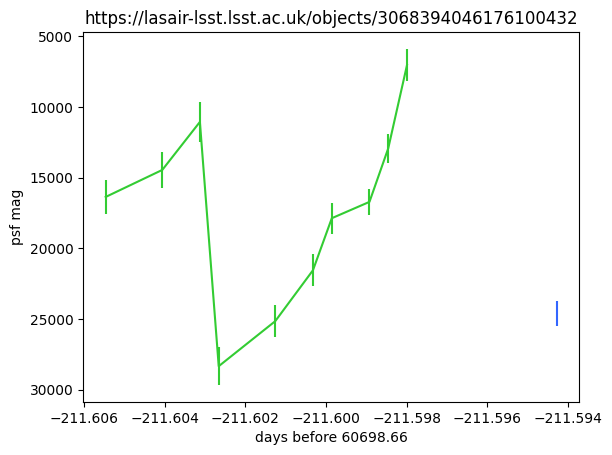

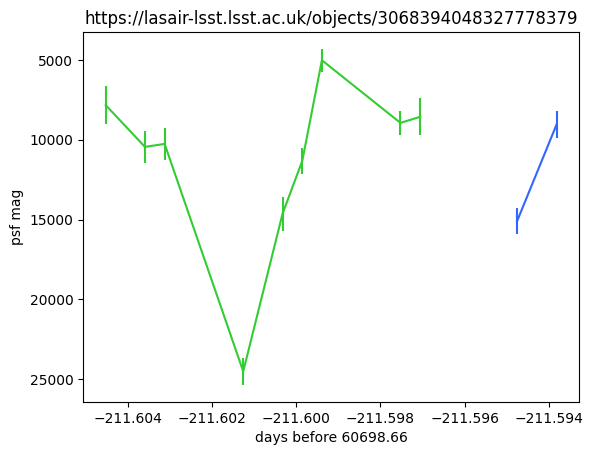

In [15]:
for obj in objectIds:
    lc = L.object(obj, lasair_added=False)
    plotLC(obj, lc['diaSources'])